In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #  for avoid unwanted warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None) # to show maximum number of columns

In [3]:
dataset=pd.read_csv('Housing_dataset.csv')

In [4]:
dataset.head(10)

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000
5,6,5,1993,796,SBrkr,1362,1,Attchd,2,480,MnPrv,Shed,143000
6,7,8,2004,1686,SBrkr,1694,2,Attchd,2,636,NaN,NaN,307000
7,8,7,1973,1107,SBrkr,2090,2,Attchd,2,484,NaN,Shed,200000
8,9,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
9,10,5,1965,1040,SBrkr,1040,1,Detchd,1,384,NaN,NaN,129500


In [5]:
dataset.shape

(1418, 13)

In [6]:
print('Total No Of ROWs =',dataset.shape[0])
print('Total No Of COLUMNs =',dataset.shape[1])

Total No Of ROWs = 1418
Total No Of COLUMNs = 13


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           1418 non-null   int64 
 1   OverallQual  1418 non-null   int64 
 2   YearBuilt    1418 non-null   int64 
 3   TotalBsmtSF  1418 non-null   int64 
 4   Electrical   1417 non-null   object
 5   GrLivArea    1418 non-null   int64 
 6   FullBath     1418 non-null   int64 
 7   GarageType   1275 non-null   object
 8   GarageCars   1418 non-null   int64 
 9   GarageArea   1418 non-null   int64 
 10  Fence        270 non-null    object
 11  MiscFeature  52 non-null     object
 12  SalePrice    1418 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 144.1+ KB


In [8]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1418.0,709.500000,409.485653,1.0,355.25,709.5,1063.75,1418.0
OverallQual,1418.0,6.114245,1.385858,1.0,5.00,6.0,7.00,10.0
YearBuilt,1418.0,1971.600846,30.064293,1872.0,1954.00,1973.0,2001.00,2010.0
TotalBsmtSF,1418.0,1061.712271,437.277589,0.0,796.50,994.0,1303.50,6110.0
GrLivArea,1418.0,1519.645275,527.412584,334.0,1132.50,1468.5,1786.00,5642.0
FullBath,1418.0,1.565585,0.551127,0.0,1.00,2.0,2.00,3.0
GarageCars,1418.0,1.763752,0.755995,0.0,1.00,2.0,2.00,4.0
GarageArea,1418.0,472.617772,216.068677,0.0,324.25,478.0,576.00,1418.0
SalePrice,1418.0,182089.485896,79970.934085,34900.0,130000.00,164800.0,215000.00,755000.0


In [9]:
#only Non-numeric data or string type data shows
dataset.describe(include="object").T

,count,unique,top,freq
Electrical,1417,5,SBrkr,1300
GarageType,1275,6,Attchd,800
Fence,270,4,MnPrv,148
MiscFeature,52,4,Shed,47


In [10]:
col_names=dataset.columns
col_names

Index(['Id', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'Electrical',
       'GrLivArea', 'FullBath', 'GarageType', 'GarageCars', 'GarageArea',
       'Fence', 'MiscFeature', 'SalePrice'],
      dtype='object')

In [11]:
#missing data show
dataset.isnull().sum()

Id                0
OverallQual       0
YearBuilt         0
TotalBsmtSF       0
Electrical        1
GrLivArea         0
FullBath          0
GarageType      143
GarageCars        0
GarageArea        0
Fence          1148
MiscFeature    1366
SalePrice         0
dtype: int64

In [12]:
dataset.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000


In [13]:
# Total cars capicity distribution by garage type
print('Total Cars Capicity : ',dataset['GarageCars'].sum())
dataset.groupby('GarageType')['GarageCars'].sum()

Total Cars Capicity :  2501


GarageType
2Types       18
Attchd     1635
Basment      30
BuiltIn     196
CarPort      15
Detchd      545
Name: GarageCars, dtype: int64

In [14]:
dataset['GarageType'].value_counts()

Attchd     800
Detchd     354
BuiltIn     87
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [15]:
dataset['Electrical'].value_counts()

SBrkr    1300
FuseA      89
FuseF      24
FuseP       3
Mix         1
Name: Electrical, dtype: int64

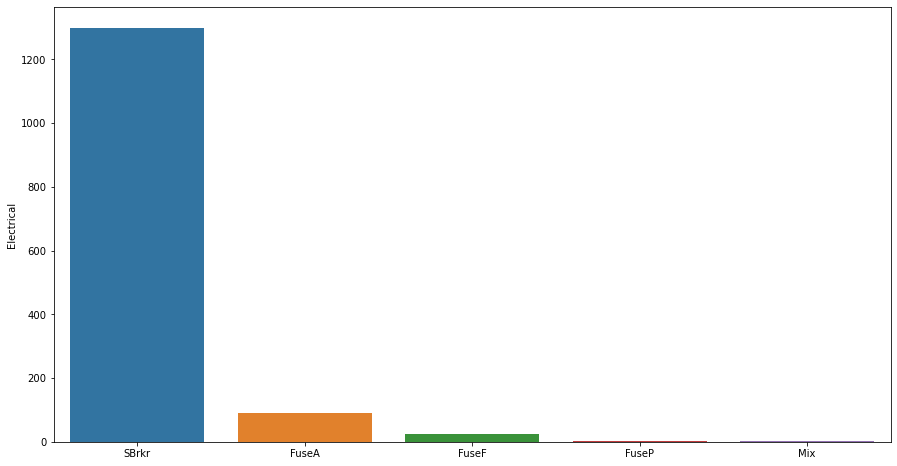

In [16]:
plt.figure(figsize=(15,8))
sns.barplot(x=dataset['Electrical'].value_counts().keys(),y=dataset['Electrical'].value_counts())
plt.show()

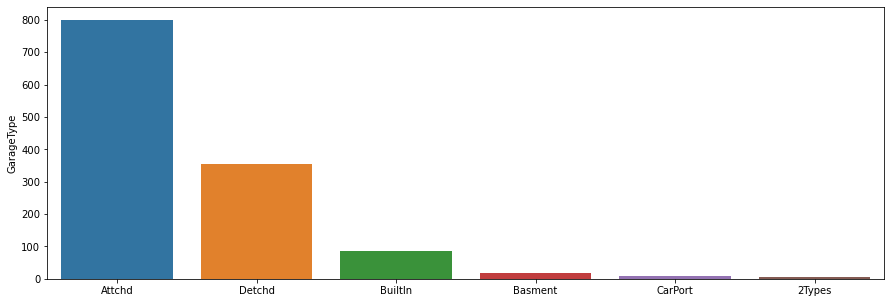

In [17]:
plt.figure(figsize=(15,5))
sns.barplot(x=dataset['GarageType'].value_counts().keys(),y=dataset['GarageType'].value_counts())
plt.show()

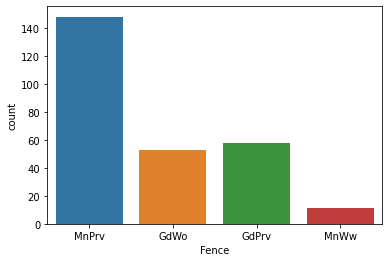

In [18]:
sns.countplot(x='Fence',data=dataset)
plt.show()

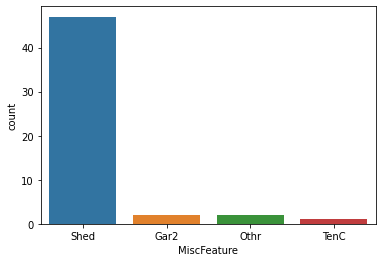

In [19]:
sns.countplot(x='MiscFeature',data=dataset)
plt.show()

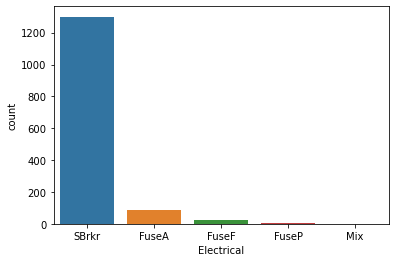

In [20]:
sns.countplot(x='Electrical',data=dataset)
plt.show()

In [21]:
dataset['OverallQual'].value_counts().sort_values()

1       2
2       3
10     17
3      19
9      43
4     112
8     168
7     312
6     362
5     380
Name: OverallQual, dtype: int64

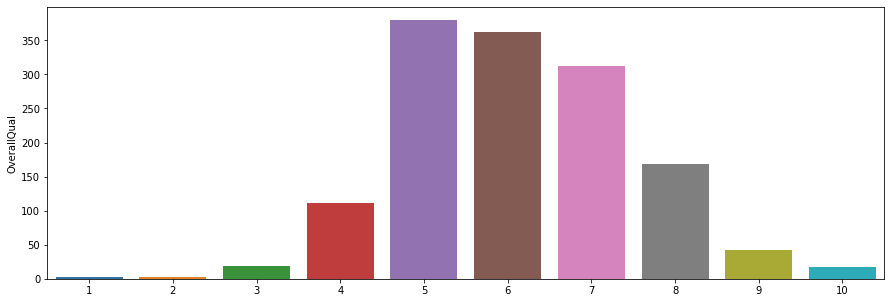

In [22]:
# OverAll Quality Rating 1-10 

plt.figure(figsize=(15,5))
sns.barplot(x=dataset['OverallQual'].value_counts().keys(),y=dataset['OverallQual'].value_counts())
plt.show()

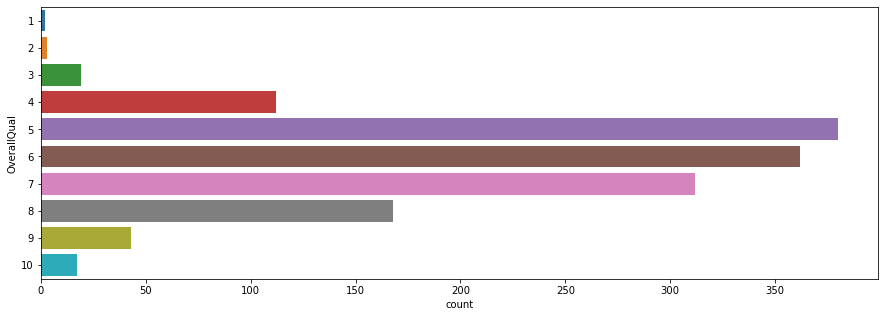

In [23]:
# OverAll Quality Rating 1-10 

plt.figure(figsize=(15,5))
sns.countplot(data=dataset,y='OverallQual')
plt.show()

In [24]:
dataset.head(15)

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000
5,6,5,1993,796,SBrkr,1362,1,Attchd,2,480,MnPrv,Shed,143000
6,7,8,2004,1686,SBrkr,1694,2,Attchd,2,636,NaN,NaN,307000
7,8,7,1973,1107,SBrkr,2090,2,Attchd,2,484,NaN,Shed,200000
8,9,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
9,10,5,1965,1040,SBrkr,1040,1,Detchd,1,384,NaN,NaN,129500


In [25]:
# Missing data In Percentage
# total_Data=dataset['MiscFeature'].shape[0]
# not_missing_data=dataset['MiscFeature'].value_counts().sum()
# missing_data=((total_Data-not_missing_data)/total_Data)*100
# print('Missing Data : ',round(missing_data,2),'%')

In [26]:
# l=['OverallQual','YearBuilt','TotalBsmtSF','Electrical','GrLivArea','FullBath','GarageType','GarageCars','GarageArea','Fence','MiscFeature','SalePrice']
# for i in l:
#     total_Data=dataset[i].shape[0]
#     not_missing_data=dataset[i].value_counts().sum()
#     missing_data=((total_Data-not_missing_data)/total_Data)*100
#     print(f'****** {i} Column ******')
#     print(f'Missing Data : {round(missing_data,4)}%')
#     print('Missing Data : ',total_Data-not_missing_data,'\n')


In [27]:
missing_data=dataset.isnull().sum() # sum of missing data how many Fields
not_missing_data=(dataset.isnull()!=1).sum() # Sum of Not Missing data How many feilds
total_Data=dataset.shape[0]
print('Missing Data In Percentage')
missedata_percent=((total_Data-not_missing_data)/total_Data)*100
missedata_percent=round(missedata_percent,2)
missedata_percent

Missing Data In Percentage


Id              0.00
OverallQual     0.00
YearBuilt       0.00
TotalBsmtSF     0.00
Electrical      0.07
GrLivArea       0.00
FullBath        0.00
GarageType     10.08
GarageCars      0.00
GarageArea      0.00
Fence          80.96
MiscFeature    96.33
SalePrice       0.00
dtype: float64

In [28]:
print('Missing Datas')
misseddata=total_Data-not_missing_data
misseddata

Missing Datas


Id                0
OverallQual       0
YearBuilt         0
TotalBsmtSF       0
Electrical        1
GrLivArea         0
FullBath          0
GarageType      143
GarageCars        0
GarageArea        0
Fence          1148
MiscFeature    1366
SalePrice         0
dtype: int64

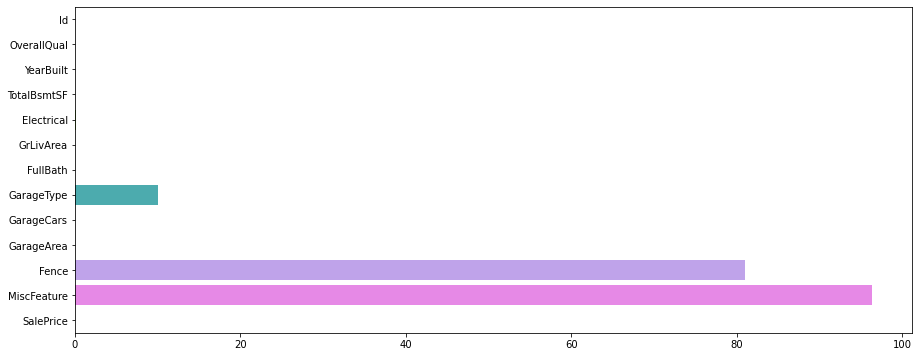

In [29]:
# Missing data barplot
plt.figure(figsize=(15,6))
x=missedata_percent.values
y=missedata_percent.keys()
sns.barplot(x,y) 
plt.show()

In [30]:
# products_list = [list(y),list(x)]

# df = pd.DataFrame (products_list).transpose()
# df.columns = ['Allcolumns', 'missingvalue']
# print (df)

In [31]:
dataset.corr() # only numeric data corrleation show

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice
Id,1.000000,-0.029188,-0.017960,-0.019396,0.002991,-0.000113,0.015633,0.014457,-0.029967
OverallQual,-0.029188,1.000000,0.584692,0.545747,0.592881,0.550112,0.609104,0.567796,0.791478
YearBuilt,-0.017960,0.584692,1.000000,0.396971,0.204757,0.478441,0.550275,0.492807,0.528006
TotalBsmtSF,-0.019396,0.545747,0.396971,1.000000,0.456365,0.326705,0.442614,0.495600,0.619852
GrLivArea,0.002991,0.592881,0.204757,0.456365,1.000000,0.626942,0.472139,0.470736,0.709503
FullBath,-0.000113,0.550112,0.478441,0.326705,0.626942,1.000000,0.473365,0.408453,0.562269
GarageCars,0.015633,0.609104,0.550275,0.442614,0.472139,0.473365,1.000000,0.884674,0.647676
GarageArea,0.014457,0.567796,0.492807,0.495600,0.470736,0.408453,0.884674,1.000000,0.627264
SalePrice,-0.029967,0.791478,0.528006,0.619852,0.709503,0.562269,0.647676,0.627264,1.000000


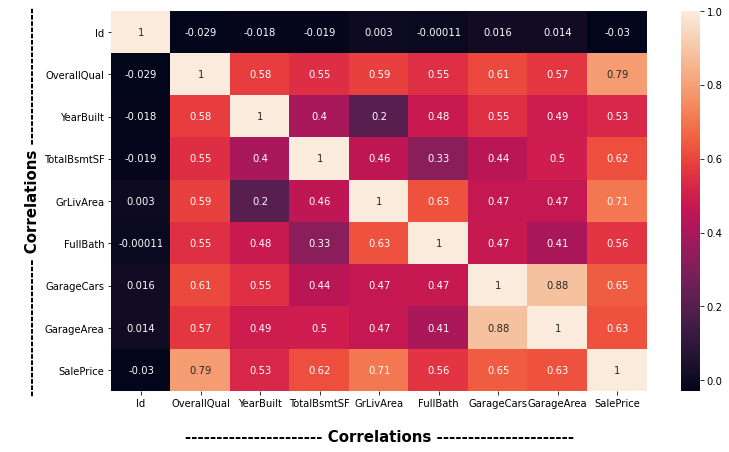

In [32]:
plt.figure(figsize=(12,7))
sns.heatmap(dataset.corr(),annot=True)
plt.xlabel("\n---------------------- Correlations ----------------------",weight="bold",fontsize=15.0)
plt.ylabel("\n---------------------- Correlations ----------------------",weight="bold",fontsize=15.0)
plt.show()

In [33]:
#check unique values fromevery column 
dataset.nunique().sort_values()

FullBath          4
Fence             4
MiscFeature       4
Electrical        5
GarageCars        5
GarageType        6
OverallQual      10
YearBuilt       110
GarageArea      440
SalePrice       653
TotalBsmtSF     717
GrLivArea       854
Id             1418
dtype: int64

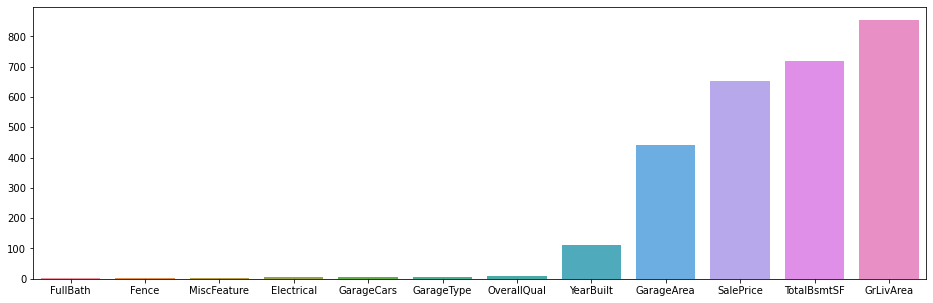

In [34]:
#check unique values fromevery column 
plt.figure(figsize=(16,5))
sns.barplot(x=dataset.nunique().sort_values().keys()[:-1],y=dataset.nunique().sort_values().values[:-1])
plt.show()

In [35]:
dataset.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000


<AxesSubplot:xlabel='YearBuilt', ylabel='count'>

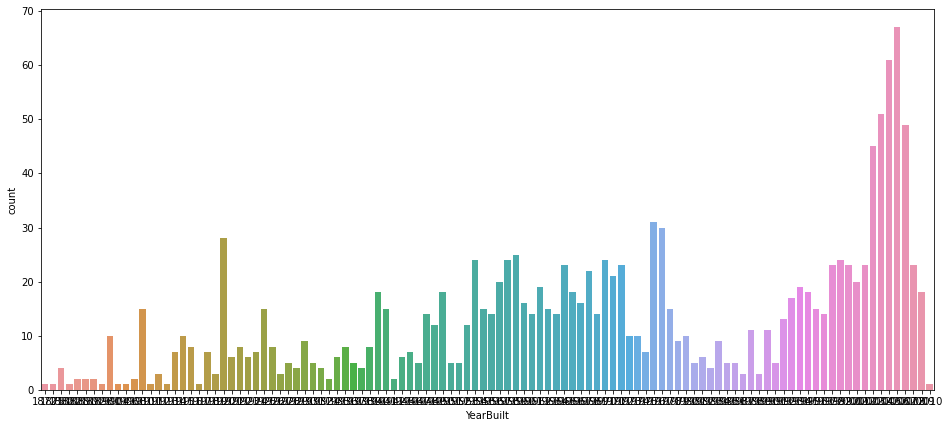

In [36]:
plt.figure(figsize=(16,7))
sns.countplot(data=dataset,x='YearBuilt')

In [37]:
# dataset['YearBuilt'].value_counts().sort_values(ascending=False)[0:10]
a=dataset['YearBuilt'].value_counts().sort_values(ascending=False)[0:10]
b=pd.Series(a.keys()).apply(str) # it helps to convert in string for show in barplot with treate like String not int values
#if we can't convert it will not showing in asending order.
a

2006    67
2005    61
2004    51
2007    49
2003    45
1976    31
1977    30
1920    28
1959    25
1999    24
Name: YearBuilt, dtype: int64

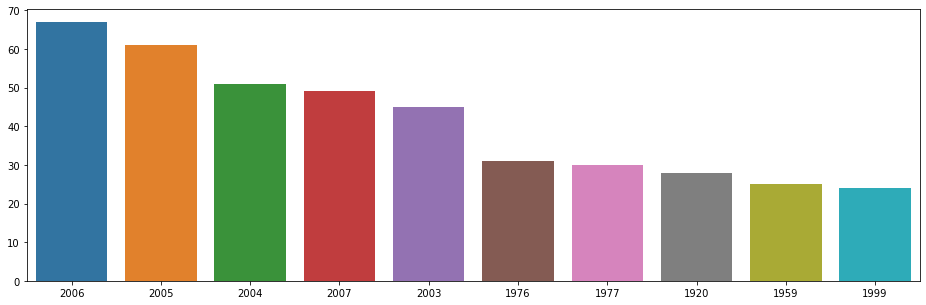

In [38]:
# top 10 most houses Built in a year in asending order
plt.figure(figsize=(16,5))
sns.barplot(x=b.values,y=a.values) 
plt.show()

In [39]:
#show only 2006 year data
year2006=dataset[dataset['YearBuilt']==2006]
year2006.head()

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
12,13,7,2006,1494,SBrkr,1494,2,Attchd,3,840,NaN,NaN,279500
45,46,8,2006,1656,SBrkr,1656,2,Attchd,3,826,NaN,NaN,249700
55,56,10,2006,1410,SBrkr,2945,3,BuiltIn,3,641,NaN,NaN,438780
57,58,8,2006,1370,SBrkr,1370,2,Attchd,2,484,NaN,NaN,202500
106,107,5,2006,1125,SBrkr,1125,1,Attchd,2,430,NaN,NaN,155000


In [40]:
year2006.shape[0] # total data

67

In [41]:
# jiski 'over all quality ' house ki 10 rating hai lekin wo 2007 year k built house hone chahiye
dataset[(dataset['OverallQual']==10) & (dataset['YearBuilt']==2007)]
#aise sirf 3 hee house hai jo ki 2007 mein bane hai or 10 start ki over all quality rating ke sath

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
369,370,10,2007,1682,SBrkr,2332,2,BuiltIn,3,846,NaN,NaN,426000
500,501,10,2007,3138,SBrkr,4676,3,BuiltIn,3,884,NaN,NaN,184750
797,798,10,2007,2078,SBrkr,2084,2,Attchd,3,1220,NaN,NaN,385000


In [42]:
# jiski 'over all quality ' house ki 10 rating hai lekin wo 2006 k or  baad ke year k built house hone chahiye
dataset[(dataset['OverallQual']==10) & (dataset['YearBuilt']>=2006)]
#aise sirf 8 hee house hai jo ki 2006 or uske baad k year mein bane hai or 10 start ki over all quality rating ke sath

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
55,56,10,2006,1410,SBrkr,2945,3,BuiltIn,3,641,NaN,NaN,438780
369,370,10,2007,1682,SBrkr,2332,2,BuiltIn,3,846,NaN,NaN,426000
419,420,10,2008,3094,SBrkr,2402,2,Attchd,3,672,NaN,NaN,555000
493,494,10,2009,2006,SBrkr,2020,2,Attchd,3,900,NaN,NaN,402861
500,501,10,2007,3138,SBrkr,4676,3,BuiltIn,3,884,NaN,NaN,184750
567,568,10,2008,1722,SBrkr,2296,2,BuiltIn,3,842,NaN,NaN,451950
797,798,10,2007,2078,SBrkr,2084,2,Attchd,3,1220,NaN,NaN,385000
962,963,10,2006,1700,SBrkr,1718,2,Attchd,3,786,NaN,NaN,337500
1207,1208,10,2006,2076,SBrkr,2076,2,Attchd,3,850,NaN,NaN,465000
1260,1261,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,NaN,NaN,160000


In [43]:
dataset[dataset['GarageType'].isnull()]

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
8,9,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
22,23,5,1968,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000
26,27,5,1957,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500
37,38,4,1955,0,FuseP,1152,2,NaN,0,0,NaN,NaN,82000
39,40,5,1959,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1388,5,1940,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000
1407,1408,5,1970,630,SBrkr,630,1,NaN,0,0,NaN,NaN,92000
1408,1409,5,1974,896,SBrkr,1792,2,NaN,0,0,NaN,NaN,136000
1411,1412,5,2006,1140,SBrkr,1140,1,NaN,0,0,NaN,NaN,84500


In [44]:
dataset['GarageType'].value_counts()

Attchd     800
Detchd     354
BuiltIn     87
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [45]:
garagetype_mean=dataset.groupby('GarageType').mean().T[1::] # i don't want to show id column
round(garagetype_mean,3)

GarageType,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd
OverallQual,5.000,6.609,5.789,7.195,4.333,5.299
YearBuilt,1953.167,1984.939,1959.842,1995.184,1949.667,1946.147
TotalBsmtSF,1305.333,1218.080,909.947,1005.920,708.778,825.715
GrLivArea,1663.667,1607.714,1567.895,2109.529,1357.000,1303.754
FullBath,1.667,1.714,1.421,2.069,1.333,1.254
GarageCars,3.000,2.044,1.579,2.253,1.667,1.540
GarageArea,919.500,542.978,441.211,581.655,451.333,419.856
SalePrice,151283.333,208698.608,160570.684,255679.920,109962.111,133621.116


In [46]:
dataset.groupby('GarageType').median().T[1::]

GarageType,2Types,Attchd,Basment,BuiltIn,CarPort,Detchd
OverallQual,5.0,7.0,6.0,7.0,4.0,5.0
YearBuilt,1959.5,1993.0,1957.0,2003.0,1962.0,1946.0
TotalBsmtSF,1172.0,1176.0,920.0,956.0,816.0,842.0
GrLivArea,1698.0,1565.0,1431.0,2035.0,1296.0,1214.0
FullBath,1.5,2.0,1.0,2.0,1.0,1.0
GarageCars,3.0,2.0,2.0,2.0,2.0,1.0
GarageArea,825.0,514.0,450.0,554.0,462.0,396.0
SalePrice,159000.0,189500.0,148000.0,230000.0,108000.0,129000.0


In [47]:
dataset.groupby('GarageType')['GarageCars'].describe()

,count,mean,std,min,25%,50%,75%,max
GarageType,,,,,,,,
2Types,6.0,3.000000,0.632456,2.0,3.0,3.0,3.0,4.0
Attchd,800.0,2.043750,0.554274,1.0,2.0,2.0,2.0,4.0
Basment,19.0,1.578947,0.507257,1.0,1.0,2.0,2.0,2.0
BuiltIn,87.0,2.252874,0.614143,1.0,2.0,2.0,3.0,3.0
CarPort,9.0,1.666667,0.500000,1.0,1.0,2.0,2.0,2.0
Detchd,354.0,1.539548,0.592556,1.0,1.0,1.0,2.0,4.0


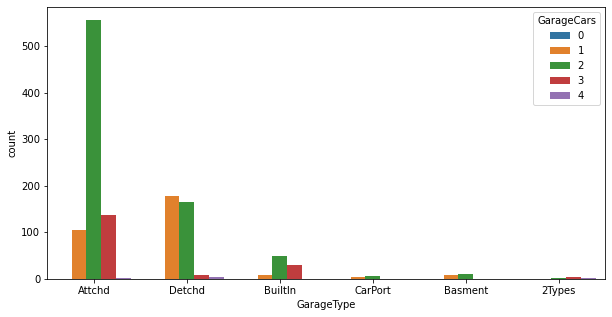

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(data=dataset,x='GarageType',hue='GarageCars')
plt.show()

In [49]:
dataset.groupby('GarageType')['GarageCars'].value_counts()

GarageType  GarageCars
2Types      3               4
            2               1
            4               1
Attchd      2             556
            3             138
            1             105
            4               1
Basment     2              11
            1               8
BuiltIn     2              49
            3              30
            1               8
CarPort     2               6
            1               3
Detchd      1             178
            2             164
            3               9
            4               3
Name: GarageCars, dtype: int64

In [50]:
missing_garage=dataset[dataset['GarageType'].isnull()]
missing_garage

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
8,9,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
22,23,5,1968,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000
26,27,5,1957,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500
37,38,4,1955,0,FuseP,1152,2,NaN,0,0,NaN,NaN,82000
39,40,5,1959,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1388,5,1940,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000
1407,1408,5,1970,630,SBrkr,630,1,NaN,0,0,NaN,NaN,92000
1408,1409,5,1974,896,SBrkr,1792,2,NaN,0,0,NaN,NaN,136000
1411,1412,5,2006,1140,SBrkr,1140,1,NaN,0,0,NaN,NaN,84500


<AxesSubplot:xlabel='GarageCars', ylabel='count'>

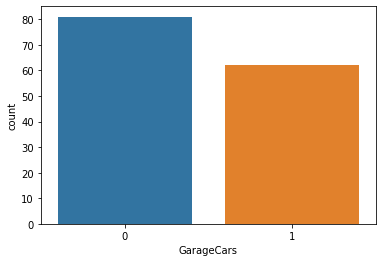

In [51]:
sns.countplot(data=missing_garage,x='GarageCars')

In [52]:
missing_garage['GarageCars'].value_counts()

0    81
1    62
Name: GarageCars, dtype: int64

In [53]:
# 81 data where is no 'garagecars' area or , in simple word you can say, there is no parking area
#we will replace those 81 datas

dataset['GarageType']=np.where((dataset['GarageType'].isnull() & (dataset['GarageCars']==0)),'NOGrage',dataset['GarageType'])


In [54]:
dataset[dataset['GarageType'].isnull()]['GarageCars'].value_counts()

1    62
Name: GarageCars, dtype: int64

In [55]:
# 62 data where is 1 'garagecars' area or , in simple word you can say, there is 1 parking area only
#we will replace those 62 datas
dataset['GarageType']= np.where((dataset['GarageType'].isnull() & (dataset['GarageCars']==1)),'Detchd', dataset['GarageType'])

In [56]:
dataset.isnull().sum()

Id                0
OverallQual       0
YearBuilt         0
TotalBsmtSF       0
Electrical        1
GrLivArea         0
FullBath          0
GarageType        0
GarageCars        0
GarageArea        0
Fence          1148
MiscFeature    1366
SalePrice         0
dtype: int64

In [57]:
dataset

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,1414,6,1999,953,SBrkr,1647,2,Attchd,2,460,NaN,NaN,175000
1414,1415,6,1978,1542,SBrkr,2073,2,Attchd,2,500,MnPrv,NaN,210000
1415,1416,7,1941,1152,SBrkr,2340,2,Attchd,1,252,GdPrv,Shed,266500
1416,1417,5,1950,1078,FuseA,1078,1,Detchd,1,240,NaN,NaN,142125


In [58]:
# delete the fence and miscfeatures
dataset.drop(columns=['MiscFeature','Fence'], inplace=True)

In [59]:
dataset

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...
1413,1414,6,1999,953,SBrkr,1647,2,Attchd,2,460,175000
1414,1415,6,1978,1542,SBrkr,2073,2,Attchd,2,500,210000
1415,1416,7,1941,1152,SBrkr,2340,2,Attchd,1,252,266500
1416,1417,5,1950,1078,FuseA,1078,1,Detchd,1,240,142125


In [60]:
dataset.shape

(1418, 11)

In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           1418 non-null   int64 
 1   OverallQual  1418 non-null   int64 
 2   YearBuilt    1418 non-null   int64 
 3   TotalBsmtSF  1418 non-null   int64 
 4   Electrical   1417 non-null   object
 5   GrLivArea    1418 non-null   int64 
 6   FullBath     1418 non-null   int64 
 7   GarageType   1418 non-null   object
 8   GarageCars   1418 non-null   int64 
 9   GarageArea   1418 non-null   int64 
 10  SalePrice    1418 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 122.0+ KB


# Multiple Linear Regreesion

In [62]:
# multiple linear regression model not accept object type value , model accept only numeric value
#so, we have to change object to dummies data like (e.g : Electrical_FuseA	Electrical_FuseF	Electrical_FuseP	)

dataset=pd.get_dummies(dataset)
dataset

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NOGrage
0,1,7,2003,856,1710,2,2,548,208500,0,0,0,0,1,0,1,0,0,0,0,0
1,2,6,1976,1262,1262,2,2,460,181500,0,0,0,0,1,0,1,0,0,0,0,0
2,3,7,2001,920,1786,2,2,608,223500,0,0,0,0,1,0,1,0,0,0,0,0
3,4,7,1915,756,1717,1,3,642,140000,0,0,0,0,1,0,0,0,0,0,1,0
4,5,8,2000,1145,2198,2,3,836,250000,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,1414,6,1999,953,1647,2,2,460,175000,0,0,0,0,1,0,1,0,0,0,0,0
1414,1415,6,1978,1542,2073,2,2,500,210000,0,0,0,0,1,0,1,0,0,0,0,0
1415,1416,7,1941,1152,2340,2,1,252,266500,0,0,0,0,1,0,1,0,0,0,0,0
1416,1417,5,1950,1078,1078,1,1,240,142125,1,0,0,0,0,0,0,0,0,0,1,0


In [63]:
dataset.dtypes

Id                    int64
OverallQual           int64
YearBuilt             int64
TotalBsmtSF           int64
GrLivArea             int64
FullBath              int64
GarageCars            int64
GarageArea            int64
SalePrice             int64
Electrical_FuseA      uint8
Electrical_FuseF      uint8
Electrical_FuseP      uint8
Electrical_Mix        uint8
Electrical_SBrkr      uint8
GarageType_2Types     uint8
GarageType_Attchd     uint8
GarageType_Basment    uint8
GarageType_BuiltIn    uint8
GarageType_CarPort    uint8
GarageType_Detchd     uint8
GarageType_NOGrage    uint8
dtype: object

### Model_0 To check

In [64]:
x=dataset.drop(columns=['SalePrice']) #SalePrice column k chdd k sb x me store honge kyuki wo independent variable hai
y=dataset['SalePrice'] # saleprice lenge kyuki ye dependent variable hai

In [65]:
#
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7,random_state=2)

In [66]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(992, 20)
(426, 20)
(992,)
(426,)


In [67]:
#
from sklearn.linear_model import LinearRegression

In [68]:
model=LinearRegression()

In [69]:
model.fit(x_train,y_train)

LinearRegression()

In [70]:
y_predict=model.predict(x_test)

In [71]:
from sklearn.metrics import r2_score,mean_squared_error

In [72]:
r2=r2_score(y_test,y_predict)
MSE=mean_squared_error(y_test,y_predict)
print('R Square value : ',r2) # accurecy
print('Mean Square Error : ',MSE) 

R Square value :  0.7872451489274014
Mean Square Error :  1292040707.2825568


In [73]:
model.intercept_ # b0 value

-543867.781510691

In [74]:
model.coef_ # b1,b2,b3,b4,......,b20 all values or you can say its slop of every indepnedent column

array([-2.68108270e+00,  2.00771778e+04,  2.40987041e+02,  2.66295699e+01,
        4.38829708e+01, -4.61968925e+01,  1.74023456e+04,  2.39216163e+01,
       -8.07520109e+03, -7.02303080e+03, -4.25371149e+04, -4.99907531e+04,
       -1.08443121e+04, -2.79894000e+04,  2.51387048e+03,  1.77416616e+03,
        1.54749794e+04, -1.47051637e+04,  4.96345243e+02,  2.24352025e+04])

In [75]:
# For Show statistics
import statsmodels.api as si
mod=si.OLS(y_train,x_train)
result=mod.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     170.0
Date:                Tue, 09 Nov 2021   Prob (F-statistic):          6.65e-293
Time:                        01:34:01   Log-Likelihood:                -11891.
No. Observations:                 992   AIC:                         2.382e+04
Df Residuals:                     972   BIC:                         2.392e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Id                    -2.6811      3

In [76]:
# we will give them whole data y and x
# For Show statistics
import statsmodels.api as si
mod=si.OLS(y,x)
result=mod.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     255.1
Date:                Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                        01:34:01   Log-Likelihood:                -16959.
No. Observations:                1418   AIC:                         3.396e+04
Df Residuals:                    1398   BIC:                         3.406e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Id                    -3.6928      2

In [77]:
print(y_predict)

[ 1.34191626e+05  1.43215899e+05  4.58247152e+05  2.15491427e+05
  1.86728825e+05  2.24339745e+05  1.06564589e+05  2.67437731e+05
  1.04794524e+05  2.34921639e+05  1.17653558e+05  2.64728984e+05
  2.11077094e+05  3.07719480e+05  1.11972204e+05  2.25688672e+05
  2.18911661e+05  1.45906830e+05  2.06297980e+05  3.41404433e+05
  6.75192014e+04  1.25527905e+05  2.50590471e+05  1.63990424e+05
  1.41948054e+05  2.84248801e+05  1.24408303e+05  8.13504386e+04
  2.36610463e+05  3.82504111e+04  1.85675603e+05  2.12304427e+05
  1.79384584e+05  1.28723364e+05  1.94322041e+05  1.62086597e+05
  2.00033649e+05  1.59474321e+05  2.00358843e+05  1.71132473e+05
  2.27467714e+05  2.17898789e+05  1.91522563e+05  3.15413726e+05
  8.64955438e+04  1.18564782e+05  1.36437079e+05  1.94425245e+05
  9.12935927e+04  2.47257084e+05  1.30054975e+05  1.93605324e+05
  1.42117956e+05  1.38311185e+05  7.40060073e+04  1.99059282e+05
  1.85986037e+05  1.51192325e+05  1.73348093e+05  1.30160957e+05
  1.15480576e+05  1.08680

In [78]:
y_error=y_test-y_predict
error_data=pd.DataFrame(np.array([y_test,y_predict,y_error])).T
error_data=error_data.rename(columns={0:'Actual',1:'Predicted',2:'Error'})
error_data

,Actual,Predicted,Error
0,145000.0,134191.626431,10808.373569
1,156000.0,143215.899433,12784.100567
2,745000.0,458247.152217,286752.847783
3,176000.0,215491.426830,-39491.426830
4,176432.0,186728.824787,-10296.824787
...,...,...,...
421,128000.0,150337.987928,-22337.987928
422,117000.0,112156.691924,4843.308076
423,142125.0,114174.742589,27950.257411
424,213000.0,223016.078105,-10016.078105


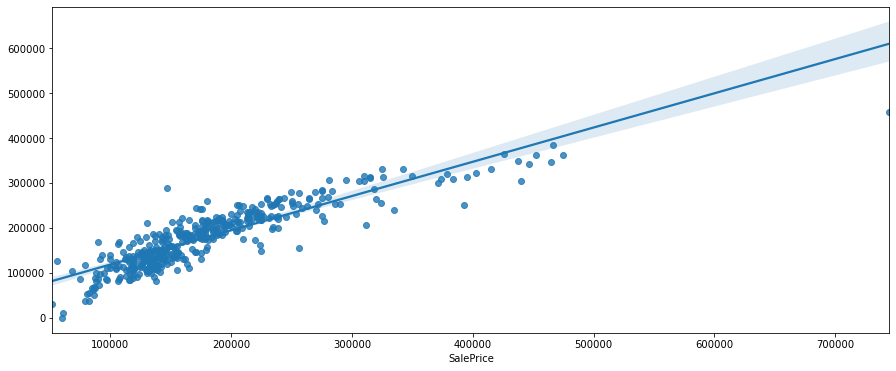

In [79]:
plt.figure(figsize=(15,6))
sns.regplot(x=y_test, y=y_predict) 
plt.show()

### Check Model_1

In [80]:
#make sure all datas are not in object format
dataset.dtypes

Id                    int64
OverallQual           int64
YearBuilt             int64
TotalBsmtSF           int64
GrLivArea             int64
FullBath              int64
GarageCars            int64
GarageArea            int64
SalePrice             int64
Electrical_FuseA      uint8
Electrical_FuseF      uint8
Electrical_FuseP      uint8
Electrical_Mix        uint8
Electrical_SBrkr      uint8
GarageType_2Types     uint8
GarageType_Attchd     uint8
GarageType_Basment    uint8
GarageType_BuiltIn    uint8
GarageType_CarPort    uint8
GarageType_Detchd     uint8
GarageType_NOGrage    uint8
dtype: object

In [81]:
dataset

,Id,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,GarageArea,SalePrice,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NOGrage
0,1,7,2003,856,1710,2,2,548,208500,0,0,0,0,1,0,1,0,0,0,0,0
1,2,6,1976,1262,1262,2,2,460,181500,0,0,0,0,1,0,1,0,0,0,0,0
2,3,7,2001,920,1786,2,2,608,223500,0,0,0,0,1,0,1,0,0,0,0,0
3,4,7,1915,756,1717,1,3,642,140000,0,0,0,0,1,0,0,0,0,0,1,0
4,5,8,2000,1145,2198,2,3,836,250000,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,1414,6,1999,953,1647,2,2,460,175000,0,0,0,0,1,0,1,0,0,0,0,0
1414,1415,6,1978,1542,2073,2,2,500,210000,0,0,0,0,1,0,1,0,0,0,0,0
1415,1416,7,1941,1152,2340,2,1,252,266500,0,0,0,0,1,0,1,0,0,0,0,0
1416,1417,5,1950,1078,1078,1,1,240,142125,1,0,0,0,0,0,0,0,0,0,1,0


In [82]:
y=dataset['SalePrice'] #I.V
x=dataset[['OverallQual','YearBuilt','TotalBsmtSF','GrLivArea','FullBath','GarageCars','GarageArea']] # D.V

In [83]:
# split the model b/w test and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)

In [84]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(992, 7)
(426, 7)
(992,)
(426,)


In [85]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()

In [86]:
#fit our model or you can say train the model to give them 70% of data which has in x_train adn y_train
model1.fit(x_train,y_train)

LinearRegression()

In [87]:
# find the predicted value w.r of our train data or you can say find the y^
y_predict = model1.predict(x_test) # y^ = a + b1x1 + b2x2 + b3x3 +...+b7x7

In [88]:
# check or find the error of our predicted values
from sklearn.metrics import r2_score,mean_squared_error

In [89]:
r2_model_1=r2_score(y_test,y_predict)
MSE_model_1=mean_squared_error(y_test,y_predict)
print('R Square Value : ',r2_model_1)
print('Mean Square Error : ',MSE_model_1)

R Square Value :  0.6623674835393043
Mean Square Error :  1933572822.797898


#### Question : Compare model_0 and model_1 which one is better?
<p>Answer : model_0 is better than model_1</p>
<p>Reason : below 👇👇👇👇👇👇👇👇👇👇👇</p>

In [90]:
print("*****  Model's Accurecy In Percentage(%)  *****")
print(f'\t\tModel_0 : {round(r2*100,2)}%')
print(f'\t\tModel_1 : {round(r2_model_1*100,2)}%') 

*****  Model's Accurecy In Percentage(%)  *****
		Model_0 : 78.72%
		Model_1 : 66.24%


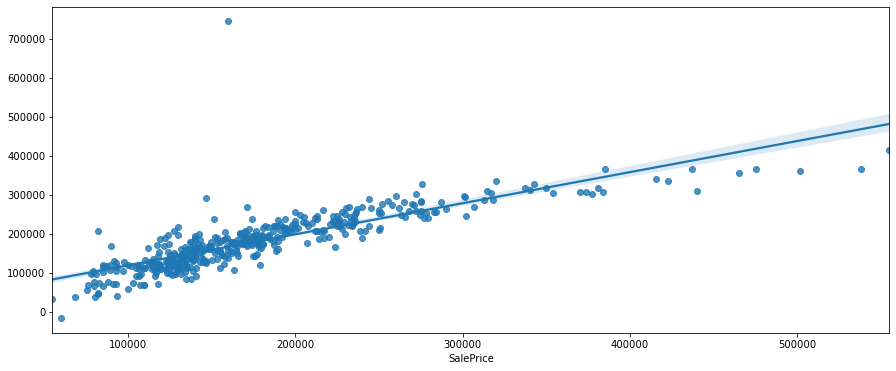

In [91]:
plt.figure(figsize=(15,6))
sns.regplot(x=y_test, y=y_predict) 
plt.show()